Import required packages

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection  import GridSearchCV

import joblib

Load and Explore Dataset

In [48]:
df = pd.read_csv('./cardio_train.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [50]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Let's look at how the presence of cardiovascular problems change with someone's age

There are 11 features, with 1 target variable.

In [51]:
# Check for missing values
missing_values = pd.DataFrame(df.isna().sum())
missing_values.T

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nice, there are no missing data.

In [52]:
# Drop useless/unwanted data
cols_useless = ['id']
df.drop(cols_useless, axis=1, inplace= True)
df.drop_duplicates(inplace= True)

Alright, now that we have a basic understanding and a cleaner dataset, we can plot some graphs.

<AxesSubplot:xlabel='years', ylabel='count'>

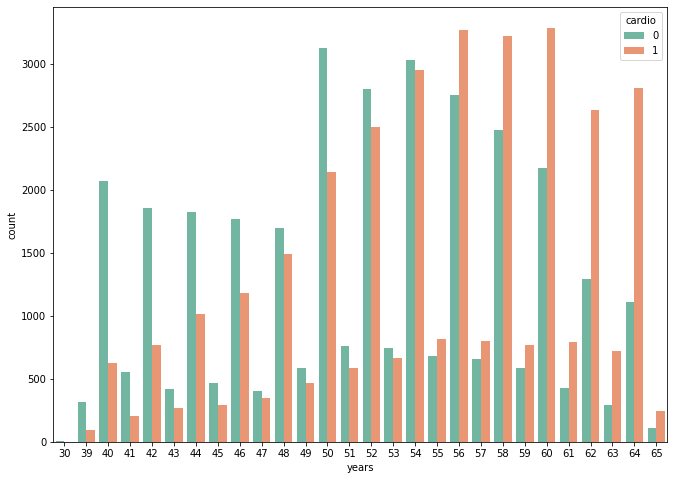

In [53]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2")

It can be observed that people over 55 of age are more exposed to CVD.

Let's look at categorical variables in the dataset and their distribution:

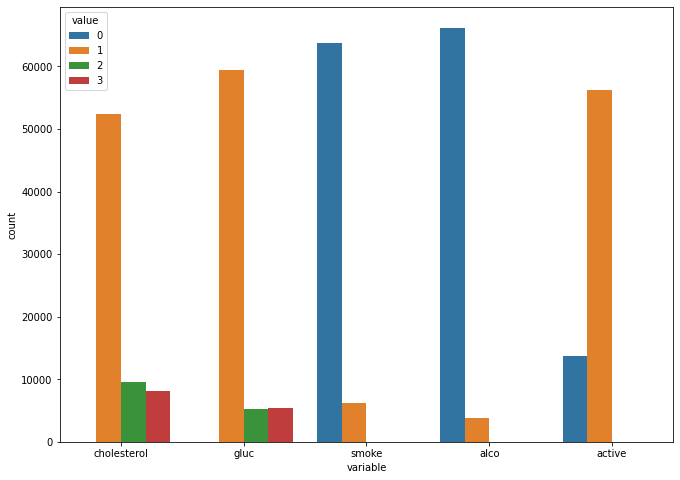

In [54]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

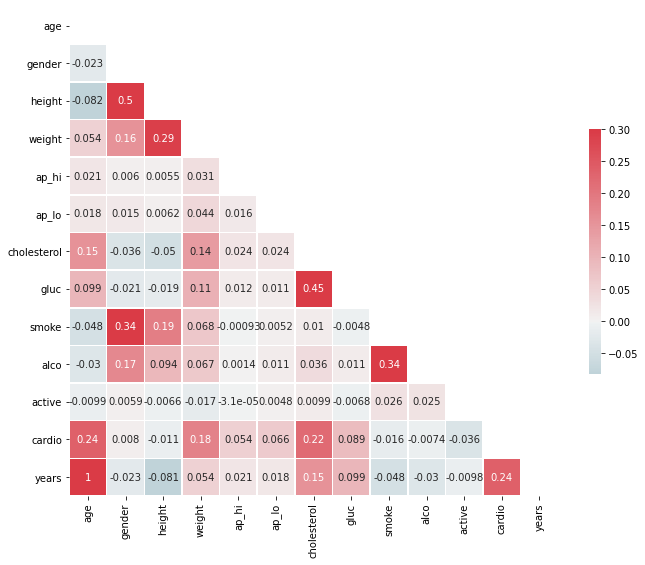

In [55]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

Feature Engineering

In [56]:
# Add BMI Column
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)

In [57]:
# Avg blood pressure
df['avg_bp'] = (df['ap_hi'] + df['ap_lo']) / 2

Here is the final dataset

In [58]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,avg_bp
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,95.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,115.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,100.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,125.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438,100.0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681,115.0
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,135.0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,107.5


Train Model

In [59]:
# Split dataset
x = df.drop(['cardio'], axis= 1)
y = df['cardio']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state= 1)

In [60]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.7126321806230351

In [61]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.5751643326664762

In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc.score(x_test, y_test)

0.7387110603029436

In [63]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian.score(x_test, y_test)

0.5889539868533867

In [64]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6851243212346385

In [65]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
abc.score(x_test, y_test)

0.7275650185767362

Seems like GradientBoostingClassifier is the best performing model, let's train it on all the data to ready for deployment and export the model

In [66]:
gbc_final = GradientBoostingClassifier()
gbc_final.fit(x, y)
joblib_file = "../application/static/model.pkl"
joblib.dump(gbc_final, joblib_file)

['../application/static/model.pkl']